<a href="https://colab.research.google.com/github/UdhayadevGS/PYTHON-REVISION/blob/main/zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
zom= pd.read_csv("zomato.csv",encoding='latin1')

#when i tried to read the csv normally an error arose stating some bits were not UTF - 8, which meant the file was not UTF-8 encoded
#hence i read the file using latin1  encoding as it is very tolerant and reads almost any byte
#to detect encoding automatically , there is a method which i didnot use here

In [3]:
zom.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
#now to check for null values
zom.isnull().sum()
#we can see that cuisenes has null values

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [5]:
#NOW I AM GOING TO MERGE ANOTHER DATA FRAME (COUNTRY) WITH THIS ZOM DATAFRAME AS I NEED COUNTRY NAME FOR ALL COUNTRY CODES

In [6]:
country = pd.read_excel('/content/Country-Code.xlsx')
country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [7]:
final =pd.merge(zom,country,on='Country Code',how='left')
#on='Country Code'	The column used to match rows in both DataFrames. It must exist in both.
#how=left means keep all data for zom on left and add country values to them
#extra info : you can rename column using df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)


In [8]:
#i will drop all na values for all columns
final = final.dropna()
#final = final.dropna(subset=['Country']) i can use this to just drop na values for a particular column
countrycount = final['Country'].value_counts()
#Always use final['Country'] instead of dot notation like final.Country as for variables with spaces it does not work eg:final.Country Code is invalid
countrycount

,count
Country,
India,8652
United States,425
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


In [9]:
indexes=countrycount.index
print(indexes) #now we can seperate index and values from the countrycount

print("\n")

values=countrycount.values
print(values)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'South Africa',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Qatar', 'Singapore', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')


[8652  425   80   60   60   60   40   34   24   22   21   20   20   20
    4]


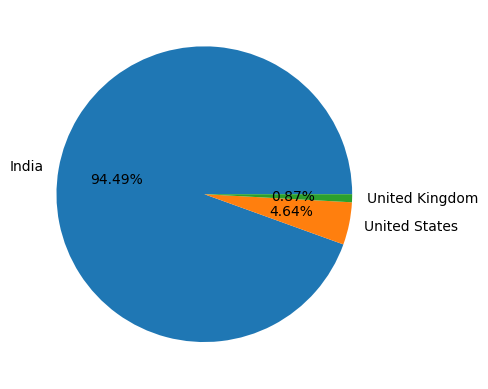

In [10]:
#now creating a pie chart using the values
#we only plot top 3 countries as many values makes the pie chart unreadable
plt.pie(values[:3],labels=indexes[0:3],autopct='%.2f%%') #autopct automatically calculates the percentage of each slice and displays
plt.show()

In [11]:
#final.head()
#final.columns
rate = final.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
#we use group by to group the ratings and get observation
#we use size to get the size of each group
#we use reset index to set 0,1,2,3 as the index again
#now to rename new column created with name 0 we use rename()
rate


,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


NameError: name 'Patch' is not defined

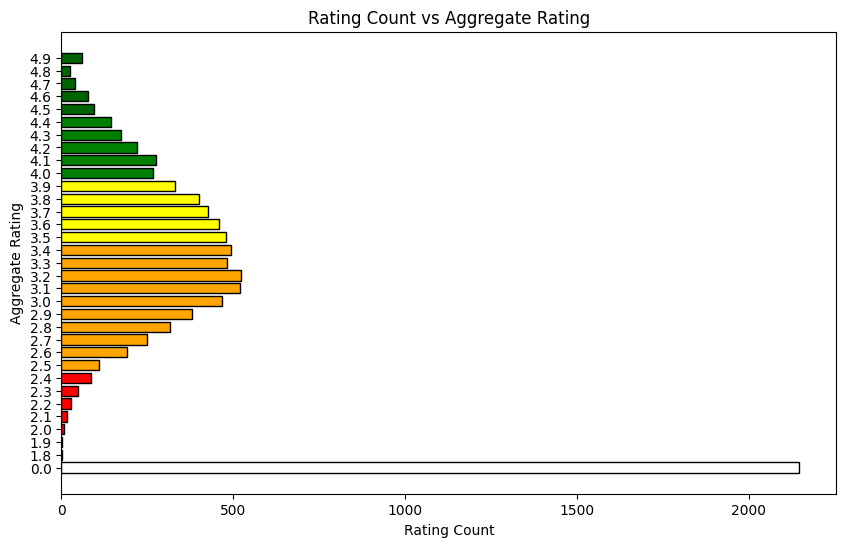

In [12]:
#observations
"""
0 is white
1.8 - 2.4 red
2.5-3.4 orange
3.5-3.9 yellow
4.0-4.4 green
4.5-4.9 dark green
"""
#first create dictionary to replace the existing map colours with new ones(colour codes) so that they can actually be plotted in the bat graph

map_colour = {
    'Dark Green': 'darkgreen',
    'Green': 'green',
    'Yellow': 'yellow',
    'Orange': 'orange',
    'Red': 'red',
    'White': 'white'}
  #map the map color to the existng coloumn to create a new column
rate['Updated colour'] = rate['Rating color'].map(map_colour)
plt.figure(figsize=(10,6))
plt.barh(rate['Aggregate rating'].astype(str),rate['Rating Count'],color=rate['Updated colour'],edgecolor='black') #we use astype str , because if we use numerical values spacing might make the plot look weird

plt.xlabel('Rating Count')
plt.ylabel('Aggregate Rating')
plt.title('Rating Count vs Aggregate Rating')

#for the legend
#Patch refers to the square inside the legend , we are doing in manually over here
legend_elements = [
    Patch(facecolor='white', edgecolor='black', label='Not Rated'),
    Patch(facecolor='red', edgecolor='black', label='Poor'),
    Patch(facecolor='orange', edgecolor='black', label='Average'),
    Patch(facecolor='yellow', edgecolor='black', label='Good'),
    Patch(facecolor='green', edgecolor='black', label='Very Good'),
    Patch(facecolor='darkgreen', edgecolor='black', label='Excellent'),
]

plt.legend(handles=legend_elements, title='Color Meaning', loc='upper right')

#dotted line for easy reading :
for x in range(0, 2400, 100):
    plt.axvline(x, color='gray', linestyle='--', linewidth=0.7, alpha=0.5)

plt.show()


In [76]:
# to find countries with 0 rating
rating_0_countries = final[final['Aggregate rating'] == 0]['Country'] #first one selects all rows to be displated  , second one selects all columns to be displayed , same as .groupby('Country)
#now to get number of 0 ratings for each country
rating_0_countries.value_counts()


## instead of above codes we can use rating_0_countries = final[final['Aggregate rating'] == 0].groupby('Country').size()

,count
Country,
India,2139
Brazil,5
United States,3
United Kingdom,1


In [18]:
#TO FIND THE CURRENCY USED BY COUNTRIES
#FIRST BRACKET GIVES THE TWO COLUMNS - COUNTRY AND CURRENCY
#THE NEXT GROUP BY GORUPS ALL THE COUNTRIES AND CURRENCIES AND GIVES THE SIZE OF EACH GROUP

final[['Country','Currency']].groupby(['Country','Currency']).size()

,,0
Country,Currency,
Australia,Dollar($),24
Brazil,Brazilian Real(R$),60
Canada,Dollar($),4
India,Indian Rupees(Rs.),8652
Indonesia,Indonesian Rupiah(IDR),21
New Zealand,NewZealand($),40
Phillipines,Botswana Pula(P),22
Qatar,Qatari Rial(QR),20
Singapore,Dollar($),20


In [80]:
#WHICH COUNTRIES HAVE ONLINE DELVIRIES
#WE NEED COLUMNS Country, Has Online delivery
online = final[['Country','Has Online delivery']].groupby(['Country','Has Online delivery']).size().reset_index()
online = online.loc[online['Has Online delivery'] == 'Yes',['Country','Has Online delivery']].reset_index(drop=True)
# in loc first [ ] checks for rows where online devivery is Yes in Column Has Online Delivery and the secpnd [] returns only those columns Country, Has Online delivery
#we use reset_index(drop=True) to remove the original index and replace with 0,1.etc
online
#Observation : Only INDIA,UAE have online delivery option



,Country,Has Online delivery
0,India,Yes
1,UAE,Yes


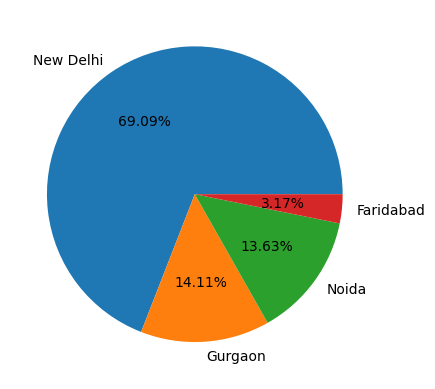

In [71]:
from enum import auto
#TASK IS TO CREATE A PIE CHART FOR CITIES DISTIBUTION
final.head()
#we need City
citycount = final.dropna()
citycount = citycount['City'].value_counts() #automatically gives in descending order important
#important this returns a panda series which has no columns so we have to access only using index and values
citypie = plt.pie(citycount.values[:4],labels=citycount.index[:4],autopct='%.2f%%')
plt.show()


In [75]:
#TASK : TO FIND TOP 10 CUISINES
cuis = final['Cuisines'].value_counts()
cuis.head(10)

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
Cafe,299
Bakery,218
"North Indian, Mughlai, Chinese",197
"Bakery, Desserts",170
